# When carpool is a good idea?


## Introduction
Carpool is the sharing of car journeys, which are mainly provided by the rider sharing compenies. The matching of carpool 

## Data import
I use the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json("https://data.cityofchicago.org/resource/m6dm-c72p.json?$limit=1000000&$order=trip_start_timestamp"
                  ,convert_dates=['trip_start_timestamp','trip_end_timestamp'])

In [8]:

df


,additional_charges,dropoff_census_tract,dropoff_centroid_latitude,dropoff_centroid_location,dropoff_centroid_longitude,dropoff_community_area,fare,pickup_census_tract,pickup_centroid_latitude,pickup_centroid_location,...,pickup_community_area,shared_trip_authorized,tip,trip_end_timestamp,trip_id,trip_miles,trip_seconds,trip_start_timestamp,trip_total,trips_pooled
0,3.45,NaN,NaN,NaN,NaN,NaN,50.0,NaN,41.993930,"{'type': 'Point', 'coordinates': [-87.75835358...",...,12.0,False,0,2018-11-01 01:00:00,1b8bd4bcc09c8f204f76d0a7cbcc81e6a7afdf8f,41.664562,2937.0,2018-11-01 00:00:00,53.45,1
1,2.50,NaN,41.890609,"{'type': 'Point', 'coordinates': [-87.75604671...",-87.756047,25.0,2.5,NaN,NaN,NaN,...,NaN,True,0,2018-11-01 00:00:00,1857e48e14ef7b13dc09824d1c6f3ec801659765,1.034688,213.0,2018-11-01 00:00:00,5.00,1
2,2.50,1.703108e+10,41.892042,"{'type': 'Point', 'coordinates': [-87.63186394...",-87.631864,8.0,7.5,1.703183e+10,41.914747,"{'type': 'Point', 'coordinates': [-87.65400702...",...,7.0,False,0,2018-11-01 00:15:00,009bff6108bdad18224f166699744a5231958c0d,2.551712,558.0,2018-11-01 00:00:00,10.00,1
3,2.50,NaN,41.689730,"{'type': 'Point', 'coordinates': [-87.66905440...",-87.669054,75.0,5.0,NaN,41.689730,"{'type': 'Point', 'coordinates': [-87.66905440...",...,75.0,False,0,2018-11-01 00:15:00,00a86e3b5eb12b9a0f08d7021b72d144e8ba9732,1.829057,299.0,2018-11-01 00:00:00,7.50,1
4,2.50,1.703106e+10,41.942585,"{'type': 'Point', 'coordinates': [-87.65664409...",-87.656644,6.0,7.5,1.703108e+10,41.907492,"{'type': 'Point', 'coordinates': [-87.63576009...",...,8.0,False,0,2018-11-01 00:15:00,00a9c99fb790a7320fbe9208933fe75f20d68122,3.970069,472.0,2018-11-01 00:00:00,10.00,1
5,2.50,1.703124e+10,41.892658,"{'type': 'Point', 'coordinates': [-87.65253448...",-87.652534,24.0,5.0,1.703103e+10,41.972668,"{'type': 'Point', 'coordinates': [-87.66386549...",...,3.0,True,0,2018-11-01 00:15:00,01e524f21f75e5593ae7c9ba4fa766aa71eb2793,6.739507,1077.0,2018-11-01 00:00:00,7.50,2
6,2.50,1.703106e+10,41.936310,"{'type': 'Point', 'coordinates': [-87.65156259...",-87.651563,6.0,10.0,1.703108e+10,41.895033,"{'type': 'Point', 'coordinates': [-87.61971067...",...,8.0,False,0,2018-11-01 00:15:00,02b060175293fc58ec96c23776872323fe3631af,4.622445,697.0,2018-11-01 00:00:00,12.50,1
7,2.50,1.703106e+10,41.949829,"{'type': 'Point', 'coordinates': [-87.64396537...",-87.643965,6.0,10.0,1.703108e+10,41.892508,"{'type': 'Point', 'coordinates': [-87.62621490...",...,8.0,False,0,2018-11-01 00:15:00,02b910d23b557bc1deb1c1f92b4eb62981376900,5.362356,814.0,2018-11-01 00:00:00,12.50,1
8,2.50,NaN,41.717493,"{'type': 'Point', 'coordinates': [-87.64889507...",-87.648895,73.0,12.5,NaN,41.778877,"{'type': 'Point', 'coordinates': [-87.59492543...",...,42.0,True,0,2018-11-01 00:15:00,0303bebde9874f6a7b2169db0fecdc9670616082,7.841297,955.0,2018-11-01 00:00:00,15.00,1
9,2.50,NaN,NaN,NaN,NaN,NaN,20.0,1.703107e+10,41.929047,"{'type': 'Point', 'coordinates': [-87.65131087...",...,7.0,False,0,2018-11-01 00:30:00,03ea10ac7097d3ec5bad0b742e72b8efe3af9c9a,10.953472,1805.0,2018-11-01 00:00:00,22.50,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
additional_charges            2000 non-null float64
dropoff_census_tract          1171 non-null float64
dropoff_centroid_latitude     1866 non-null float64
dropoff_centroid_location     1866 non-null object
dropoff_centroid_longitude    1866 non-null float64
dropoff_community_area        1866 non-null float64
fare                          2000 non-null float64
pickup_census_tract           1238 non-null float64
pickup_centroid_latitude      1913 non-null float64
pickup_centroid_location      1913 non-null object
pickup_centroid_longitude     1913 non-null float64
pickup_community_area         1913 non-null float64
shared_trip_authorized        2000 non-null bool
tip                           2000 non-null int64
trip_end_timestamp            2000 non-null datetime64[ns]
trip_id                       2000 non-null object
trip_miles                    2000 non-null float64
trip_secon

In [11]:
df['trips_pooled'].describe()

count    2.000000e+06
mean     1.267011e+00
std      6.702985e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.100000e+01
Name: trips_pooled, dtype: float64

([<matplotlib.patches.Wedge at 0xa090898>,
 [Text(-0.6538822924739416, -1.0061997553115498, 'No-sharing'),
  Text(0.8318886641449155, 0.7196952483288938, '2'),
  Text(0.3536392599529175, 1.0416041828928841, '3'),
  Text(0.05057492851160268, 1.0988367379215378, '>3')],
 [Text(-0.3814313372764659, -0.5869498572650708, '81.7%'),
  Text(0.45375745316995386, 0.3925610445430329, '9.4%'),
  Text(0.19289414179250045, 0.5681477361233913, '7.5%'),
  Text(0.02758632464269237, 0.5993654934117478, '1.5%')])

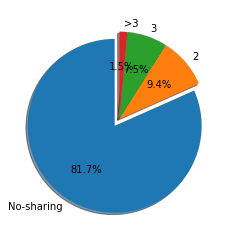

In [29]:
c=np.histogram(df['trips_pooled'], bins=[1,2,3,4,5])
plt.pie(c[0], explode=(0.1, 0, 0, 0), labels=('No-sharing', '2', '3', '>3'), autopct='%1.1f%%',
        shadow=True, startangle=90)

Most of trips are not shared. Very few trips are shared by 3+ riders! In order to meausre the efficiency of carpool, I come up with two metrics. One is the average travel time per mile, another is the ratio of trip's geometric distance to the trip miles. The fomer reflects the waiting time cost due to carpool, while the latter reflects the ratio of detour for picking up another rider. 

(array([[1.35992465e-05, 2.13950781e-07, 6.68596190e-08, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.71829221e-04, 4.44349028e-05, 1.73835009e-07, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.86872635e-04, 3.99539711e-04, 1.97503315e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 array([   0.    ,   99.8625,  199.725 ,  299.5875,  399.45  ,  499.3125,
         599.175 ,  699.0375,  798.9   ,  898.7625,  998.625 , 1098.4875,
        1198.35  , 1298.2125, 1398.075 , 1497.9375, 1597.8   , 1697.6625,
        1797.525 , 1897.3875, 1997.25  , 20

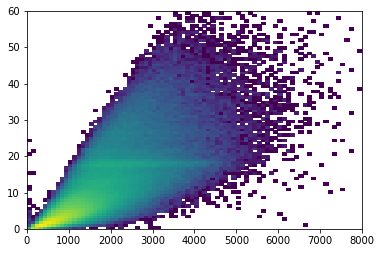

In [19]:
import matplotlib as mpl
d = df[(df['trip_seconds']<=8000) & (df['trip_miles']<=60)]
plt.hist2d(d['trip_seconds'],d['trip_miles'],bins=80,norm=mpl.colors.LogNorm(),normed=True)



'ax = axs[1]\nd = df[df[\'trips_pooled\']==1]\nhb = ax.hexbin(d[\'trip_seconds\'],d[\'trip_miles\'],bins=\'log\',mincnt=4)\nax.set_title("Hexagon binning")\nax.grid(color=\'r\', linestyle=\'--\', linewidth=2,alpha=0.3)\n\n\ncb = fig.colorbar(hb, ax=ax)\ncb.set_label(\'counts\')\n\n\n'

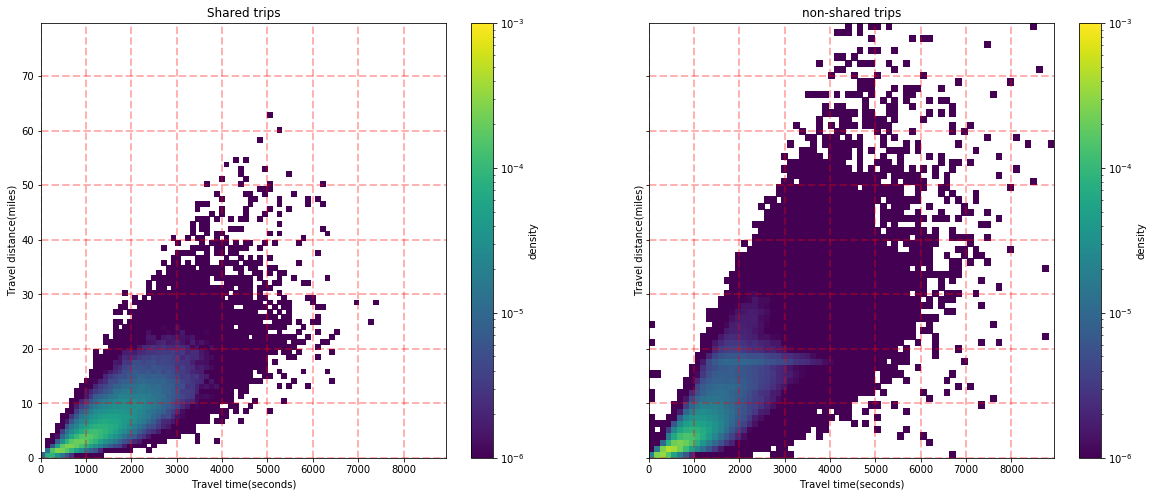

In [12]:
import matplotlib as mpl
da = df[(df['trip_seconds']<=9000) & (df['trip_miles']<=80)]


fig, axs = plt.subplots(ncols=2, sharex = True,sharey = True,figsize=(18, 8))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

ax = axs[0]
d = da[da['trips_pooled']>1]
h = ax.hist2d(d['trip_seconds'],d['trip_miles'],vmin=10**-6,vmax=10**-3,norm=mpl.colors.LogNorm(),bins=70,normed=True)
ax.grid(color='r', linestyle='--', linewidth=2,alpha=0.3)
ax.set_title("Shared trips")
ax.set_xlabel('Travel time(seconds)')
ax.set_ylabel('Travel distance(miles)')
cb = fig.colorbar(h[3], ax=ax)
cb.set_label('density')

ax = axs[1]
d = da[da['trips_pooled']==1]
h = ax.hist2d(d['trip_seconds'],d['trip_miles'],vmin=10**-6,vmax=10**-3,bins=70,norm=mpl.colors.LogNorm(),normed=True)
ax.grid(color='r', linestyle='--', linewidth=2,alpha=0.3)
ax.set_title("non-shared trips")
ax.set_xlabel('Travel time(seconds)')
ax.set_ylabel('Travel distance(miles)')
cb = fig.colorbar(h[3], ax=ax)
cb.set_label('density')





'''ax = axs[1]
d = df[df['trips_pooled']==1]
hb = ax.hexbin(d['trip_seconds'],d['trip_miles'],bins='log',mincnt=4)
ax.set_title("Hexagon binning")
ax.grid(color='r', linestyle='--', linewidth=2,alpha=0.3)


cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')


'''


'\nax = axs[1]\nd = da[da[\'trips_pooled\']==1]\nh = ax.hist2d(d[\'trip_seconds\'],d[\'trip_miles\'],vmin=10**-6,vmax=10**-3,bins=70,norm=mpl.colors.LogNorm(),normed=True, cmin=10**-7)\nax.grid(color=\'r\', linestyle=\'--\', linewidth=2,alpha=0.3)\nax.set_title("non-shared trips")\nax.set_xlabel(\'Travel time(seconds)\')\nax.set_ylabel(\'Travel distance(miles)\')\ncb = fig.colorbar(h[3], ax=ax)\ncb.set_label(\'density\')\n'

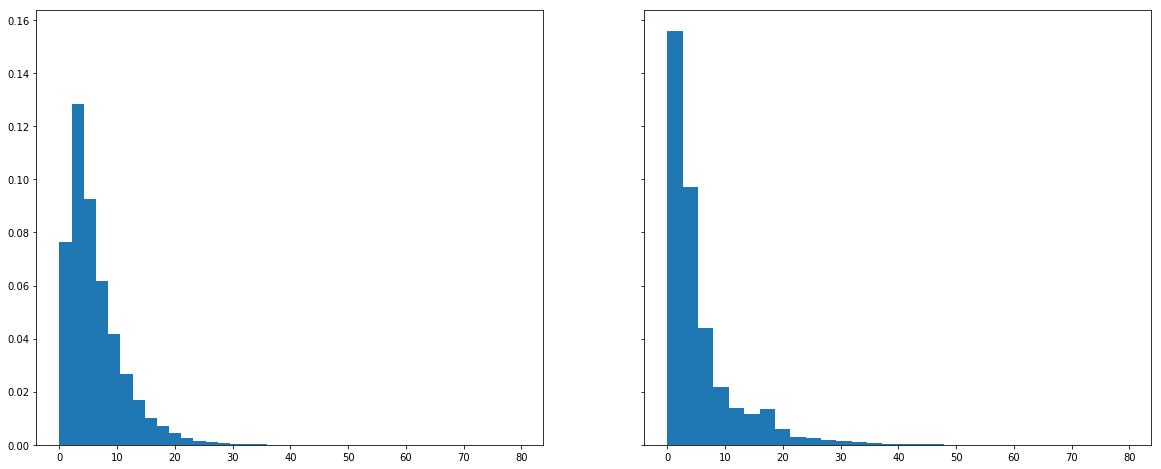

In [10]:
da = df[(df['trip_seconds']<=9000) & (df['trip_miles']<=80)]


fig, axs = plt.subplots(ncols=2, sharex = True,sharey = True,figsize=(18, 8))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

ax = axs[0]
d = da[da['trips_pooled']>1]
ax.hist(d['trip_miles'],bins=30,density= True)

ax = axs[1]
d = da[da['trips_pooled']==1]
ax.hist(d['trip_miles'],bins=30,density= True)


'''
ax = axs[1]
d = da[da['trips_pooled']==1]
h = ax.hist2d(d['trip_seconds'],d['trip_miles'],vmin=10**-6,vmax=10**-3,bins=70,norm=mpl.colors.LogNorm(),normed=True, cmin=10**-7)
ax.grid(color='r', linestyle='--', linewidth=2,alpha=0.3)
ax.set_title("non-shared trips")
ax.set_xlabel('Travel time(seconds)')
ax.set_ylabel('Travel distance(miles)')
cb = fig.colorbar(h[3], ax=ax)
cb.set_label('density')
'''



In [25]:
d1=da[da['trips_pooled']==1]
len(d1[d1['trip_miles']> 30])/len(d1)


0.010500441697714412

### Notes:
#### 1. minmal count is set to remove very isolated point from the graph.
#### 2. This graph shows the 2-d density of time-distance of trips.

### Several observations:
#### 1. Delay from ride-sharing increases with trip distance
For each point, the slope represents the overall traveling speed. There is no significant difference in the overal speed for short distance, i.e., less than 10 miles. Shared trips are slightly slowed down when trip distance is longer. One explanation is that, when trip distance is short, the second(or third, fourth, etc.) rider expects the dirver to come in any minute and prepare for the ride, so the driver's waiting time might be lower.  
#### 2. long-distance riders prefer not to share
There are not too many long-distance shared trips(> 35 miles). But we do observe some clusters with long distance in non-shared trips.It is somewhat counterintutive, since we normally believe people prefer to share long distance trips than they do for short-distance trips. Maybe they are afraid of the unstable travel time? or maybe there is difficulty finding a match for long-distance trips?
#### 3. But the average data shows different thing

Next, I want to examine if the second point is due to riders' preference or mathcing issue

Text(0.5, 1.0, 'Taveling distance per second')

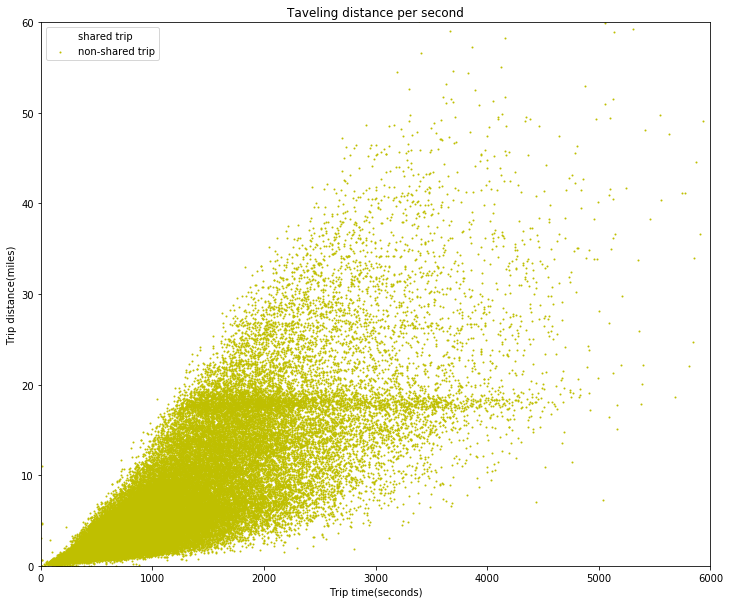

In [40]:
plt.figure(figsize=(12,10))
d = df[df['trips_pooled']>1]
plt.scatter(d['trip_seconds'],d['trip_miles'],s=1,c='r',label='shared trip',alpha=0)
d = df[df['trips_pooled']==1]
plt.scatter(d['trip_seconds'],d['trip_miles'],s=1,c='y',label='non-shared trip',alpha=1)
plt.xlim(0,6000)
plt.ylim(0,60)

plt.xlabel('Trip time(seconds)')
plt.ylabel('Trip distance(miles)')
plt.legend()
plt.title('Taveling distance per second')




Some observations:
1. Non-shared trips usually have short distance
2. When trip distance is short, there isn't much speed difference between shared and non-shared trips. When the trip distance is long, shared trips signficantly takes more time.


### Time pattern of carpool
I will firstly examine the time pattern 

In [88]:
df.iloc[1]

additional_charges                                                          2.5
dropoff_census_tract                                                        NaN
dropoff_centroid_latitude                                               41.8906
dropoff_centroid_location     {'type': 'Point', 'coordinates': [-87.75604671...
dropoff_centroid_longitude                                              -87.756
dropoff_community_area                                                       25
fare                                                                        2.5
pickup_census_tract                                                         NaN
pickup_centroid_latitude                                                    NaN
pickup_centroid_location                                                    NaN
pickup_centroid_longitude                                                   NaN
pickup_community_area                                                       NaN
shared_trip_authorized                  